In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
dataset = pd.read_csv("E:\\python\\New folder (3)\\stockmarket\\AAPL.csv")
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
0,23.174999,23.469999,22.937500,23.424999,20.720243,301660000,APPLE
1,23.682501,23.762501,23.392500,23.562500,20.841864,251108000,APPLE
2,23.532499,23.690001,23.367500,23.465000,20.755623,182724000,APPLE
3,23.510000,23.530001,22.975000,23.072500,20.408440,218996000,APPLE
4,23.049999,23.110001,22.719999,22.820000,20.185091,218100000,APPLE


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2518 non-null   float64
 1   High          2518 non-null   float64
 2   Low           2518 non-null   float64
 3   Close         2518 non-null   float64
 4   Adj Close     2518 non-null   float64
 5   Volume        2518 non-null   int64  
 6   company_name  2518 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [4]:
data = dataset[0:2000]
testdata = dataset[2000:2518]
data

,Open,High,Low,Close,Adj Close,Volume,company_name
0,23.174999,23.469999,22.937500,23.424999,20.720243,301660000,APPLE
1,23.682501,23.762501,23.392500,23.562500,20.841864,251108000,APPLE
2,23.532499,23.690001,23.367500,23.465000,20.755623,182724000,APPLE
3,23.510000,23.530001,22.975000,23.072500,20.408440,218996000,APPLE
4,23.049999,23.110001,22.719999,22.820000,20.185091,218100000,APPLE
...,...,...,...,...,...,...,...
1995,155.520004,156.740005,152.929993,154.509995,152.781464,115366700,APPLE
1996,153.500000,155.449997,145.809998,146.500000,144.861099,142689800,APPLE
1997,142.770004,146.199997,138.800003,142.559998,140.965179,182602000,APPLE
1998,144.589996,148.100006,143.110001,147.110001,145.464279,113990900,APPLE


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

C:\Users\aksha\AppData\Local\Temp\ipykernel_20240\668710601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Close"]=pd.to_numeric(data.Close,errors='coerce')


In [6]:
trainData

array([[ 20.72024345],
       [ 20.84186363],
       [ 20.75562286],
       ...,
       [140.96517944],
       [145.46427917],
       [143.91183472]])

In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(2000, 1)

In [8]:
X_train = []
y_train = []

for i in range (60,len(trainData)): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1940, 60, 1)

In [10]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [11]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
61/61 - 8s - loss: 0.0105 - 8s/epoch - 129ms/step
Epoch 2/20
61/61 - 4s - loss: 0.0018 - 4s/epoch - 67ms/step
Epoch 3/20
61/61 - 4s - loss: 0.0019 - 4s/epoch - 65ms/step
Epoch 4/20
61/61 - 4s - loss: 0.0017 - 4s/epoch - 67ms/step
Epoch 5/20
61/61 - 4s - loss: 0.0019 - 4s/epoch - 67ms/step
Epoch 6/20
61/61 - 4s - loss: 0.0018 - 4s/epoch - 69ms/step
Epoch 7/20
61/61 - 4s - loss: 0.0014 - 4s/epoch - 69ms/step
Epoch 8/20
61/61 - 4s - loss: 0.0015 - 4s/epoch - 71ms/step
Epoch 9/20
61/61 - 4s - loss: 0.0012 - 4s/epoch - 72ms/step
Epoch 10/20
61/61 - 4s - loss: 0.0014 - 4s/epoch - 70ms/step
Epoch 11/20
61/61 - 4s - loss: 0.0012 - 4s/epoch - 70ms/step
Epoch 12/20
61/61 - 4s - loss: 0.0015 - 4s/epoch - 71ms/step
Epoch 13/20
61/61 - 4s - loss: 0.0014 - 4s/epoch - 72ms/step
Epoch 14/20
61/61 - 4s - loss: 0.0019 - 4s/epoch - 72ms/step
Epoch 15/20
61/61 - 4s - loss: 0.0012 - 4s/epoch - 70ms/step
Epoch 16/20
61/61 - 4s - loss: 0.0013 - 4s/epoch - 71ms/step
Epoch 17/20
61/61 - 5s - loss: 0

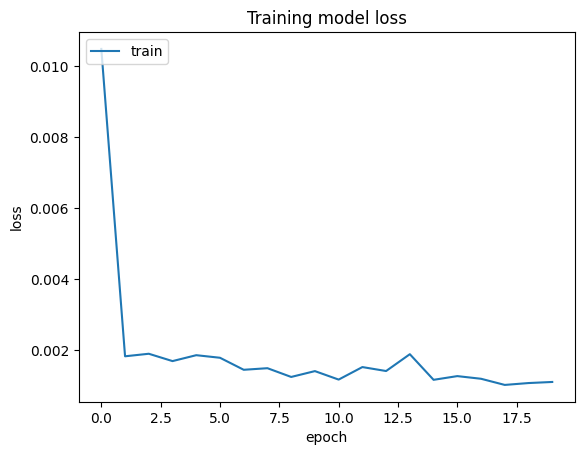

In [12]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
testData=dataset[2000:2518]
testData

,Open,High,Low,Close,Adj Close,Volume,company_name
2000,148.860001,149.770004,146.679993,149.240005,147.570435,78336300,APPLE
2001,146.850006,147.360001,139.899994,140.820007,139.244614,109742900,APPLE
2002,139.880005,141.660004,136.600006,137.350006,135.813446,136095600,APPLE
2003,139.089996,140.699997,132.610001,137.589996,136.050751,137426100,APPLE
2004,137.789993,143.259995,137.649994,143.110001,141.509003,117726300,APPLE
...,...,...,...,...,...,...,...
2513,192.899994,194.990005,192.520004,194.029999,194.029999,50080500,APPLE
2514,194.639999,195.320007,193.029999,194.350006,194.350006,47471400,APPLE
2515,195.399994,196.899994,194.869995,195.869995,195.869995,54156800,APPLE
2516,195.690002,196.500000,194.169998,194.479996,194.479996,41181800,APPLE


In [14]:

testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

C:\Users\aksha\AppData\Local\Temp\ipykernel_20240\3990921063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')


(458, 60, 1)

In [15]:
y_pred = model.predict(X_test)
y_pred

15/15 [==============================] - 1s 17ms/step


array([[0.86254317],
       [0.8678055 ],
       [0.87333333],
       [0.8791008 ],
       [0.8850506 ],
       [0.8909144 ],
       [0.8960455 ],
       [0.8994952 ],
       [0.90077394],
       [0.8999745 ],
       [0.8978655 ],
       [0.89446837],
       [0.8896869 ],
       [0.8834481 ],
       [0.87586087],
       [0.86748   ],
       [0.8587722 ],
       [0.85012   ],
       [0.8421175 ],
       [0.8350962 ],
       [0.8296165 ],
       [0.8267308 ],
       [0.8257448 ],
       [0.82591337],
       [0.82625645],
       [0.8259333 ],
       [0.8250232 ],
       [0.82412857],
       [0.82334745],
       [0.82253987],
       [0.8213065 ],
       [0.8194824 ],
       [0.81723416],
       [0.81459135],
       [0.81077194],
       [0.80489177],
       [0.79728836],
       [0.78918916],
       [0.7817851 ],
       [0.7757623 ],
       [0.77075464],
       [0.7663637 ],
       [0.76217455],
       [0.7579226 ],
       [0.7541408 ],
       [0.7507667 ],
       [0.74817556],
       [0.746

In [16]:
predicted_price = sc.inverse_transform(y_pred)

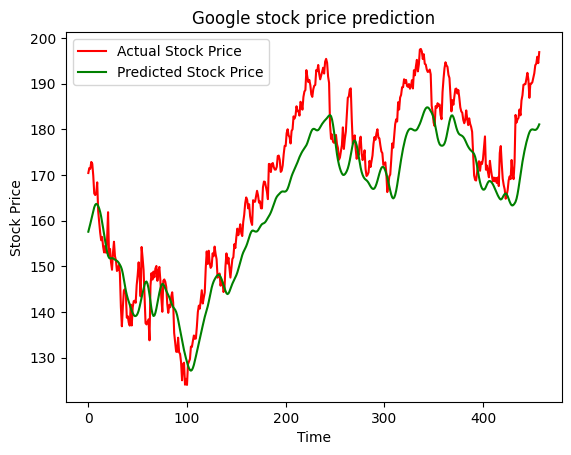

In [17]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [18]:
model2 = Sequential()

model2.add(LSTM(units=256, return_sequences = True, input_shape =(X_train.shape[1],1)))
model2.add(Dropout(0.2))

model2.add(LSTM(units=128, return_sequences = True))
model2.add(Dropout(0.2))

model2.add(LSTM(units=64, return_sequences = True))
model2.add(Dropout(0.2))

model2.add(LSTM(units=32, return_sequences = False))
model2.add(Dropout(0.2))

model2.add(Dense(units =1))
model2.compile(optimizer='adam',loss="mean_squared_error")

In [19]:
hist2 = model2.fit(X_train, y_train, epochs = 30, batch_size = 32, verbose=2)

Epoch 1/30
61/61 - 11s - loss: 0.0103 - 11s/epoch - 182ms/step
Epoch 2/30
61/61 - 8s - loss: 0.0039 - 8s/epoch - 124ms/step
Epoch 3/30
61/61 - 7s - loss: 0.0030 - 7s/epoch - 121ms/step
Epoch 4/30
61/61 - 7s - loss: 0.0031 - 7s/epoch - 122ms/step
Epoch 5/30
61/61 - 7s - loss: 0.0023 - 7s/epoch - 122ms/step
Epoch 6/30
61/61 - 8s - loss: 0.0021 - 8s/epoch - 126ms/step
Epoch 7/30
61/61 - 8s - loss: 0.0020 - 8s/epoch - 127ms/step
Epoch 8/30
61/61 - 8s - loss: 0.0021 - 8s/epoch - 131ms/step
Epoch 9/30
61/61 - 8s - loss: 0.0019 - 8s/epoch - 124ms/step
Epoch 10/30
61/61 - 8s - loss: 0.0023 - 8s/epoch - 125ms/step
Epoch 11/30
61/61 - 8s - loss: 0.0021 - 8s/epoch - 132ms/step
Epoch 12/30
61/61 - 8s - loss: 0.0019 - 8s/epoch - 126ms/step
Epoch 13/30
61/61 - 8s - loss: 0.0021 - 8s/epoch - 126ms/step
Epoch 14/30
61/61 - 8s - loss: 0.0017 - 8s/epoch - 127ms/step
Epoch 15/30
61/61 - 9s - loss: 0.0019 - 9s/epoch - 144ms/step
Epoch 16/30
61/61 - 9s - loss: 0.0018 - 9s/epoch - 141ms/step
Epoch 17/30
61/

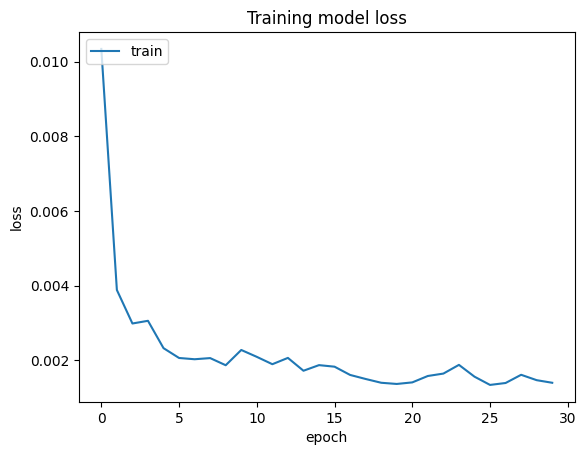

In [20]:
plt.plot(hist2.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [21]:
y_pred2 = model2.predict(X_test)
y_pred2

15/15 [==============================] - 1s 39ms/step


array([[0.9067038 ],
       [0.91104174],
       [0.9167674 ],
       [0.9236873 ],
       [0.9312834 ],
       [0.9386176 ],
       [0.94419575],
       [0.94624406],
       [0.94418   ],
       [0.93884385],
       [0.9324579 ],
       [0.9257189 ],
       [0.91857433],
       [0.91060525],
       [0.90157735],
       [0.89212775],
       [0.8828491 ],
       [0.8741861 ],
       [0.86693734],
       [0.8613812 ],
       [0.85815185],
       [0.8587962 ],
       [0.86157656],
       [0.8645259 ],
       [0.86555266],
       [0.8633462 ],
       [0.8588295 ],
       [0.85422444],
       [0.8506997 ],
       [0.8484291 ],
       [0.84656954],
       [0.84441555],
       [0.84191656],
       [0.83893967],
       [0.8339654 ],
       [0.8253597 ],
       [0.8139835 ],
       [0.80267125],
       [0.7941812 ],
       [0.7898231 ],
       [0.7882356 ],
       [0.7875223 ],
       [0.7859225 ],
       [0.7825066 ],
       [0.77842146],
       [0.77415156],
       [0.7709429 ],
       [0.769

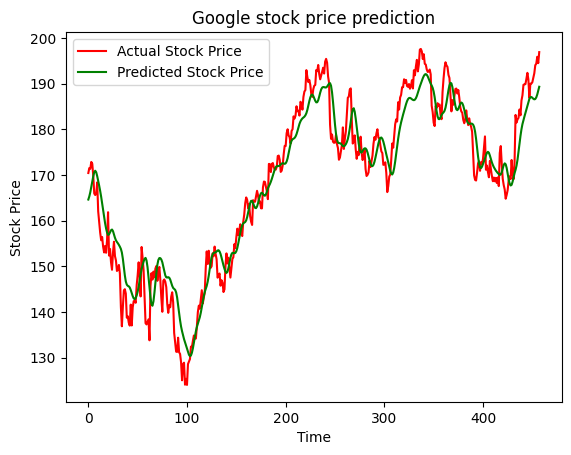

In [22]:
predicted_price2 = sc.inverse_transform(y_pred2)
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price2, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()